# The Vicsek model 

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def vecsum1(x,y): #returns the sum of two vectors
    return [x[0]+y[0], x[1]+y[1]]

In [3]:
def distance1(x,y): #returns the distance between two vectors
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2)**(1/2)

In [4]:
def distance2(a,b,change=False):
    xdist, ydist = a[0] - b[0], a[1] - b[1]
    if xdist < -7.5:
        t1 = -15
    elif xdist >= -7.5 and a[0] - b[0] <= 7.5:
        t1 = 0
    elif xdist > 7.5:
        t1 = 15
    if ydist < -7.5:
        t2 = -15
    elif ydist >= -7.5 and a[1] - b[1] <= 7.5:
        t2 = 0
    elif ydist > 7.5:
        t2 = 15
    if change == True:
        return [b[0]-a[0]+t1, b[1]-a[1]+t2]  # this is for part 6.
    return np.sqrt((b[1]-a[1]+t2)**2 + (b[0]-a[0]+t1)**2)


In [28]:
def quiverplot(birds, title):
    plt.figure()
    plt.quiver(birds[0],birds[1],np.cos(birds[2]),np.sin(birds[2]), np.arange(len(birds[0])), scale=25, width=.004)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.title(title)
    plt.show()

In order to let the model have periodic boundry conditions, we use:

In [5]:
def periodicBC(birdpos): #¬change to vector mag 3
    for i in range(len(birdpos[0])):
        birdpos[0][i]=birdpos[0][i]%15
        birdpos[1][i]=birdpos[1][i]%15
    return birdpos

Firstly, use the matplotlib `quiver` plot to make an illustration: 

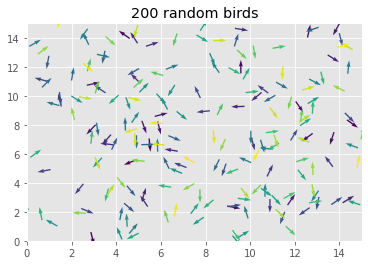

In [21]:
# quiver function to make plots of vector fields
xval=15*np.random.rand(200)
yval=15*np.random.rand(200)
theta=2*np.pi*np.random.rand(200)
quiverplot([xval,yval,theta],'200 random birds')


To see that the function `periodicBC` works, use `xval + 15` and `yval + 15` to create a new figure. The new figure and the old one should be the same.

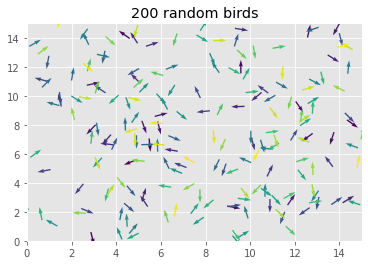

In [22]:
part11 = periodicBC([xval+15,yval+15,theta])
quiverplot(part11,'200 random birds')

## Part 2

Firstly, in order to have a periodic boundry condition, we need to define a new distance function `distance1(a,b)`.

Define a function called `proximity(bird)` to choose every bird whose distance between the bird 
is closer than R. 

In [17]:
'''def proximity(bird,R,birdspos):
    closebirds=[]
    for i in range(len(birdspos[0])):
        a = [birdspos[0][i], birdspos[1][i]]
        if distance2(a,bird) < R:
            closebirds.append([a[0],a[1],theta[i]])
    
    return closebirds'''

def proximity(x,R,xval,yval,theta):
    bird0 = []
    bird1 = []
    theta0 = []
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        if distance2(a,x) < R:
            bird0.append(a[0])
            bird1.append(a[1])
            theta0.append(theta[i])
    return bird0, bird1, theta0


Again, make a figure to illustrate the result

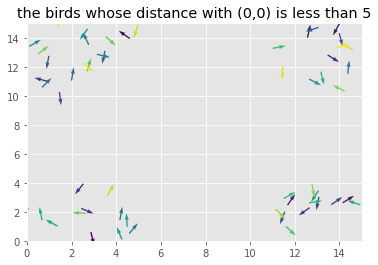

In [30]:
part21 = proximity([0,0],5,xval,yval,theta)
quiverplot(part21,'the birds whose distance with (0,0) is less than 5')

Now, define a function to apply the equations (9) and (10)

In [10]:
def position1(x,R,xval,yval,theta,sigma,v0):
    a = proximity(x,R,xval,yval,theta)
    vec = [0,0]
    n = np.zeros((len(a[0]),2))
    for i in range(len(a[0])):
        n[i] = [np.cos(a[2][i]), np.sin(a[2][i])]
    for t in range(len(a[0])):
        vec = vecsum1(n[t],vec)  # compute the vector sum
    vec = vec / distance1(vec,[0,0])
    theta0 = np.arctan2(vec[1], vec[0])
    theta0 += np.random.normal(0,np.sqrt(sigma),1)  # add the noise which is distributed to N(0,sigma).
    
    thetai = np.asscalar(theta0)
    ni = [np.cos(thetai), np.sin(thetai)]
    pos = vecsum1(np.array(ni)*v0, x)
    
    return pos[0], pos[1], thetai

Now we have a funtion `angle1` for equation (10) which means that if select a bird x with influential radius R and noise parameter sigma then we will get a new angle theta0. This angle can be inserted into equation (9) to get the position for bird x in a new time step. To do this,
We need to define a new function called `position1`

Apply this function to all birds **at the same time**. To do this, write a new function called `finalpos`

In [11]:
def finalpos(R,xval,yval,theta,sigma,v0):
    xval0 = np.zeros((len(xval)))
    yval0 = np.zeros((len(yval)))
    theta0 = np.zeros((len(theta)))
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        b = position1(a,R,xval,yval,theta,sigma,v0)
        xval0[i] = b[0]
        yval0[i] = b[1]
        theta0[i] = b[2]
    return xval0, yval0, theta0

Make an illustration to make sure that this function goes in correct direction:

In [12]:
part22 = finalpos(1,xval,yval,theta,.001,.5)
plt.figure()
plt.quiver(part23[0] ,part23[1],
           np.cos(part23[2]),np.sin(part23[2]), scale=25, width=.004)
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('the position of 200 random birds after 1 time step')
plt.show()

TypeError: proximity() takes 3 positional arguments but 5 were given

## Part 3

Define the `finalplot` function to make the figure after n time steps.

In [ ]:
def finalplot(R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False):
    a = np.zeros((n+1,3,len(xval)))
    a[0] = xval, yval, theta
    for i in range(n):
        a[i+1] = finalpos(R,a[i][0],a[i][1],a[i][2],sigma,v0) # determine the position
        a[i+1] = periodicBC(a[i+1][0], a[i+1][1], a[i+1][2]) # use the periodic boundary condition
        
    if plot:
        plt.figure()
        plt.quiver(a[n][0], a[n][1],
                   np.cos(a[n][2]),np.sin(a[n][2]), scale=25, width=.004)
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.title('the position of 200 random birds after {} time step'.format(n))
        plt.show()
    if verbose:
        return a

This is the distribution of birds after 1000 time steps.

In [ ]:
finalplot(1,xval,yval,theta,.1,.5,10)

Now consider the Vicsek order parameter which is a function of time step n.

In [ ]:
def n1(theta):
    vec = [0,0]
    for i in range(len(theta)):
        a = [np.cos(theta[i]), np.sin(theta[i])]
        vec = vecsum1(a,vec)
    return distance1(vec,[0,0]) / len(theta)

The above function is to compute the Vicsek order parameter at a particular time step. To compute the parameter for every time step which is less that n, define the following function:

In [ ]:
def VOP(R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False): # use this function to compute the Vicsek order parameter.
    parameter = np.zeros(n+1)
    a = finalplot(R,xval,yval,theta,sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        theta0 = a[i][2]
        parameter[i] = n1(theta0)
    if plot:
        plt.figure()
        plt.plot(np.arange(n+1),parameter,label='the Vicsek order parameter')
        plt.plot([0,n],[1,1],'--')
        plt.ylim(0,1.1)
        plt.xlabel('time steps')
        plt.ylabel('the Vicsek order parameter')
        plt.title('a measure of the alignment between birds')
        plt.legend()
        plt.show()
    if verbose:
        return parameter

In [ ]:
VOP(1,xval,yval,theta,.1,.5,10)

In [ ]:
%timeit finalplot(1,xval,yval,theta,.01,.5,5)

In [ ]:
%timeit VOP(1,xval,yval,theta,.1,.5,5)

## Part 4

In this part, use python to derive several small movies to illustrate the Vicsek model.

In [ ]:
import cv2
import glob

In order to create a small vedio we need to write a function to generate huge amount of figures in the same folder firstly. Notice that here the order of these figures is critical. 

In [ ]:
def saveplot(R,xval,yval,theta,sigma,v0,n):
    a = finalplot(R,xval,yval,theta,sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        fig,ax = plt.subplots( nrows=1, ncols=1 )
        ax.quiver(a[i][0], a[i][1],
                  np.cos(a[i][2]),np.sin(a[i][2]), scale=25, width=.004)
        plt.xlim(0,15)
        plt.ylim(0,15)
        fig.savefig('/home/randa/Documents/Code/The-Vicsek-model-master/Images/{}.png'.format(10000+i))   # save the figure to file
        plt.close(fig)

In [ ]:
saveplot(1,xval,yval,theta,.5,.5,1000)

Now we can use these figures to create a movie. It is easy to get several movies by just changing the value of sigma. Here we choose sigma = 0.01, 0.1 and 0.5.

In [ ]:
a = glob.glob('/home/randa/Documents/Code/The-Vicsek-model-master/Images/*.png')
img_array = []
for filename in a:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    print(size)
    img_array.append(img)
    
out = cv2.VideoWriter('/home/randa/Documents/Code/The-Vicsek-model-master/Images/sigma = {}.avi'.format(0.5),
                      cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()

## Part 5

In this part, we need to regard the Vicsek model parameter n as a function of the noise parameter sigma. The key idea here is that extract the n traces in terms of time steps and put it into a csv file. Then abandon the first several n which are not steady compared with the average.

Here we use `pandas`.

In [ ]:
import pandas as pd

In [ ]:
part51 = np.linspace(.01,1,10)

In [ ]:
part52 = np.zeros((10,601))
for i in range(10):
    part52[i] = VOP(1,xval,yval,theta,part51[i],.5,600,plot=False,verbose=True)

In [ ]:
part5columns = ['sigma = {}'.format(part51[i]) for i in range(10)]
part5index = ['step = {}'.format(n) for n in range(601)]
part5content = part52.T
df1 = pd.DataFrame(part5content, columns=part5columns, index=part5index)
df1

In [ ]:
df1.to_csv("/home/randa/Documents/Code/The-Vicsek-model-master/Vicsek.csv")

Now we have the csv file which contains the n traces in terms of different sigma. Since only the values of n which are steady make sense, we abandon the first 121 `n`s for each sigma and extract the 122nd to the 201st. 

In [ ]:
df2 = pd.read_csv("/home/randa/Documents/Code/The-Vicsek-model-master/Vicsek-sqrt-len(sigma)=10.csv",
                 delimiter=",", encoding = "ISO-8859-1")
df2.head()

In [ ]:
df2[401:601]

In [ ]:
part53 = np.zeros(10)
for i in range(10):
    part53[i] = np.mean(df2[401:601]['sigma = {}'.format(part51[i])])

Now we can make a plot where the average of Vicsek order parameter is a function of sigma.

In [ ]:
plt.figure()
plt.plot(part51,part53,label='the average of Vicsek order parameter')
plt.ylim(-0.05,1.05)
plt.xlabel('sigma')
plt.ylabel('the steady average values')
plt.title('the n(σ) phase transition plot')
plt.legend()
plt.show()

In order to create an error bar, now write a function which returns the `maxium distance` in a list.

Now create the error bar.

In [ ]:
[np.std(df2[401:601]['sigma = {}'.format(part51[i])]) for i in range(len(part51))]

In [ ]:
part5yerr = [np.std(df2[401:601]['sigma = {}'.format(part51[i])]) for i in range(len(part51))] 
fig, ax = plt.subplots()
ax.errorbar(part51, part53, yerr=part5yerr, fmt='-.', label='the average of Vicsek order parameter')
ax.set_xlabel('sigma')
ax.set_ylabel('the steady average values')
ax.set_title('the n(σ) phase transition plot')
ax.legend()
plt.show()

## Part 6

In this part, we add a pred in the previous system. Use the function `f = Rprey * log(1/x)` to describe the influences of the pred to the birds whose distances with the prey are less than `Rprey`.  

In [ ]:
part6pred = [15*np.random.rand(), 15*np.random.rand()]
part6theta = 2*np.pi*np.random.rand()

For the prey, define a function compute its position at every step.

In [ ]:
def position_pred(pred,predangle,vpred,Rpred,xval,yval,theta):
    birds1 = proximity(pred,Rpred,xval,yval,theta)
    vec = np.array([0,0])
    if len(birds1[0]) == 0:
        return pred[0]+np.cos(predangle)*vpred, pred[1]+np.sin(predangle)*vpred, predangle
    for i in range(len(birds1[0])):
        rinf = np.log(Rpred/distance2(pred,[birds1[0][i],birds1[1][i]])) # use the function f = log(Rprey/r)
        t = distance2(pred, [birds1[0][i], birds1[1][i]], change=True)
        inf = rinf * (np.array(t)
                      / distance1(t ,[0,0])) # influence of a particular bird
        vec = vecsum1(vec,inf)
    alpha = np.arctan2(vec[1],vec[0])
    vec = [np.cos(alpha), np.sin(alpha)]
    pos = vecsum1(np.array(vec)*vpred, pred)
    return pos[0] ,pos[1], alpha

Again use the function `y = (theta1 - theta2) * x / R + theta2` to consider the influence of the pred towards birds. Write a new function to consider the position of birds.

In [ ]:
def position2(pred,Rpred,x,R,xval,yval,theta,sigma,v0):
    a = proximity(x,R,xval,yval,theta)
    vec = [0,0]
    n = np.zeros((len(a[0]),2))
    for i in range(len(a[0])):
        n[i] = [np.cos(a[2][i]), np.sin(a[2][i])]
    for t in range(len(a[0])):
        vec = vecsum1(n[t],vec)  # compute the vector sum
    vec = vec / distance1(vec,[0,0])
    theta0 = np.arctan2(vec[1], vec[0])
    
    if distance2(x,pred) < Rpred:  # the birds are as easily as the pred to notice each other.
        theta1 = np.arctan2(x[1]-pred[1] , x[0]-pred[0])
        distance = distance2(x,pred)
        theta0 = (theta1 - theta0) * distance / Rpred + theta0
    
    theta0 += np.random.normal(0,np.sqrt(sigma),1)  # add the noise which is distributed to N(0,sigma).
        
    thetai = np.asscalar(theta0)
    ni = [np.cos(thetai), np.sin(thetai)]
    pos = vecsum1(np.array(ni)*v0, x)
    
    return pos[0], pos[1], thetai

In [ ]:
def finalpos1(pred,Rpred,R,xval,yval,theta,sigma,v0):
    xval0 = np.zeros((len(xval)))
    yval0 = np.zeros((len(yval)))
    theta0 = np.zeros((len(theta)))
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        b = position2(pred,Rpred,a,R,xval,yval,theta,sigma,v0)
        xval0[i] = b[0]
        yval0[i] = b[1]
        theta0[i] = b[2]
    return xval0, yval0, theta0

Now make a new plot:

In [ ]:
def periodicBC1(a,b,c):
    while a > 15:
        a -= 15
    while a < 0:
        a += 15
    while b > 15:
        b -= 15
    while b < 0:
        b += 15
    return a,b,c

In [ ]:
def finalplot_pred(pred,predangle,vpred,Rpred,R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False):
    a = np.zeros((n+1,3,len(xval)))
    b = np.zeros((n+1,3))
    a[0] = xval, yval, theta
    b[0] = pred[0], pred[1], predangle
    for i in range(n):
        a[i+1] = finalpos1(b[i],Rpred,R,a[i][0],a[i][1],a[i][2],sigma,v0) # determine the position
        a[i+1] = periodicBC(a[i+1][0], a[i+1][1], a[i+1][2]) # use the periodic boundary condition
        
        b[i+1] = position_pred(b[i][:2],b[i][2],vpred,Rpred,a[i][0],a[i][1],a[i][2])
        b[i+1] = periodicBC1(b[i+1,0],b[i+1,1],b[i+1,2])
    if plot:
        plt.figure()
        plt.quiver(a[n][0], a[n][1],
                   np.cos(a[n][2]),np.sin(a[n][2]), np.arange(len(xval)),scale=25, width=.004)
        plt.quiver(b[n][0], b[n][1],
                   np.cos(b[n][2]),np.sin(b[n][2]), scale=12, width=.012)
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.title('the position of 200 random birds after {} time step'.format(n))
        plt.show()
    if verbose:
        return a, b

In [ ]:
finalplot_pred(part6pred,part6theta,1,2,1,xval,yval,theta,.01,.5,100,plot=True,verbose=False)

Similarly, create several videos to illustrate the result.

In [ ]:
def saveplot_pred(pred,predangle,vpred,Rpred,R,xval,yval,theta,sigma,v0,n):
    a, b = finalplot_pred(pred,predangle,vpred,Rpred,R,xval,yval,theta,
                       sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        fig,ax = plt.subplots(nrows=1, ncols=1)
        ax.quiver(a[i][0], a[i][1],
                  np.cos(a[i][2]),np.sin(a[i][2]), np.arange(len(xval)),scale=25, width=.004)
        ax.quiver(b[i][0], b[i][1],
                  np.cos(b[i][2]),np.sin(b[i][2]), scale=12, width=.012)
        
        plt.xlim(0,15)
        plt.ylim(0,15)
        fig.savefig('/home/randa/Documents/Code/The-Vicsek-model-master/Images/{}.png'.format(10000+i))   # save the figure to the file
        plt.close(fig)

In [ ]:
saveplot_pred(part6pred,part6theta,.6,3.5,1,xval,yval,theta,.01,.5,100)

In [ ]:
a = glob.glob('/home/randa/Documents/Code/The-Vicsek-model-master/Images/*.png')
img_array = []
for filename in a:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('/home/randa/Documents/Code/The-Vicsek-model-master/with pred_sigma = {}.avi'.format(0.01),
                      cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()

If the prey can eat birds, we have:

In [ ]:
def delete1(pred,vpred,birdsx,birdsy,birdstheta,v0):
    caneat = proximity(pred,1,birdsx,birdsy,birdstheta) # the birds who are possibly to be eaten.
    num = len(caneat[0])
    if num == 0:
        return birdsx, birdsy, birdstheta
    index = []
    for i in range(num):
        index.append(list(birdsx).index(caneat[0][i]))
    return np.delete(birdsx,index), np.delete(birdsy,index), np.delete(birdstheta,index)

In [ ]:
def finalplot_pred_eat(pred,predangle,vpred,Rpred,R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False):
    a = []
    b = np.zeros((n+1,3))
    a.append([xval, yval, theta])
    b[0] = pred[0], pred[1], predangle
    for i in range(n):
        
        newstate = delete1(pred,vpred,a[4*i][0],a[4*i][1],a[4*i][2],v0)
        a.append(newstate)
        
        a.append( finalpos1(b[i],Rpred,R,a[4*i+1][0],a[4*i+1][1],a[4*i+1][2],sigma,v0) ) # determine the position
        a.append( periodicBC(a[4*i+2][0], a[4*i+2][1], a[4*i+2][2]) ) # use the periodic boundary condition
        
        b[i+1] = position_pred(b[i][:2],b[i][2],vpred,Rpred,a[4*i+1][0],a[4*i+1][1],a[4*i+1][2])
        b[i+1] = periodicBC1(b[i+1,0],b[i+1,1],b[i+1,2])
        
        a.append( periodicBC(a[4*i+2][0], a[4*i+2][1], a[4*i+2][2]) )
        
    if plot:
        plt.figure()
        plt.quiver(a[4*n][0], a[4*n][1],
                   np.cos(a[4*n][2]),np.sin(a[4*n][2]), np.arange(len(a[4*n][0])),scale=25, width=.004)
        plt.quiver(b[n][0], b[n][1],
                   np.cos(b[n][2]),np.sin(b[n][2]), scale=12, width=.012)
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.title('the position of 200 random birds after {} time step'.format(n))
        plt.show()
    if verbose:
        return a, b

In [ ]:
finalplot_pred_eat(part6pred,part6theta,1,2,1,xval,yval,theta,.01,.5,50,plot=True,verbose=False)

In [ ]:
def saveplot_pred_eat(pred,predangle,vpred,Rpred,R,xval,yval,theta,sigma,v0,n):
    a, b = finalplot_pred_eat(pred,predangle,vpred,Rpred,R,xval,yval,theta,
                       sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        fig,ax = plt.subplots(nrows=1, ncols=1)
        ax.quiver(a[4*i][0], a[4*i][1],
                  np.cos(a[4*i][2]),np.sin(a[4*i][2]), np.arange(len(a[4*i][0])),scale=25, width=.004)
        ax.quiver(b[i][0], b[i][1],
                  np.cos(b[i][2]),np.sin(b[i][2]), scale=12, width=.012)
        
        plt.xlim(0,15)
        plt.ylim(0,15)
        fig.savefig('/home/randa/Documents/Code/The-Vicsek-model-master/Images/{}.png'.format(10000+i))   # save the figure to the file
        plt.close(fig)

In [ ]:
saveplot_pred_eat(part6pred,part6theta,0.6,3.5,1,xval,yval,theta,.01,.5,100)

In [ ]:
a = glob.glob('/home/randa/Documents/Code/The-Vicsek-model-master/Images/*.png')
img_array = []
for filename in a:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('/home/randa/Documents/Code/The-Vicsek-model-master/with pred_sigma = {}.avi'.format(0.01),
                      cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()